#### 1. Lesen Sie aus dem Unterordner /data die Titanic-Trainingsdaten in ein DataFrame ein
> Hinweis: Eine Beschreibung der Daten finden Sie bei [Kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('data/titanic_train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

#### 2. Behalten Sie nur die relevanten Attribute und die Zeilen ohne fehlende Werte
> Hinweise:<br>
> a. Eine Kopie der relevanten Spalten erhält man mittels `df_a = df.loc[:,['r1','r2',...,'rn']]`<br>
> b. Nicht relevant sind die Spalten `Name`, `Ticket` und `Cabin` (für uns ...)<br>
> c. Für DataFrames existiert die Methode `dropna`

In [18]:
df_relevant=df.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].dropna()
df_relevant.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df_relevant.shape

(712, 8)

#### 3. Kodieren Sie die beiden kategorialen Spalten um
> Hinweis: Will man die Werte einer Spalte in einem Dataframe überschreiben, so tut man das auch mittels `df.loc[:,['sp']] = ...`

In [5]:
df_relenc = df_relevant

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_relenc.loc[:,'Sex'] = le.fit_transform(df_relenc['Sex'])
# df_enc=df_relevant.apply(le.fit_transform)
df_relenc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [6]:
df_relenc = df_relevant

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_relenc.loc[:,'Embarked'] = le.fit_transform(df_relenc['Embarked'])
# df_enc=df_relevant.apply(le.fit_transform)
df_relenc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### 4. Trainieren Sie einen Entscheidungsbaum mit dem Gini-Index bis zu einer maximalen Tiefe von 3 zur Vorhersage, ob eine Person überlebt hat oder nicht

In [8]:
y = df_relenc['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
X=df_relenc.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [10]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [19]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

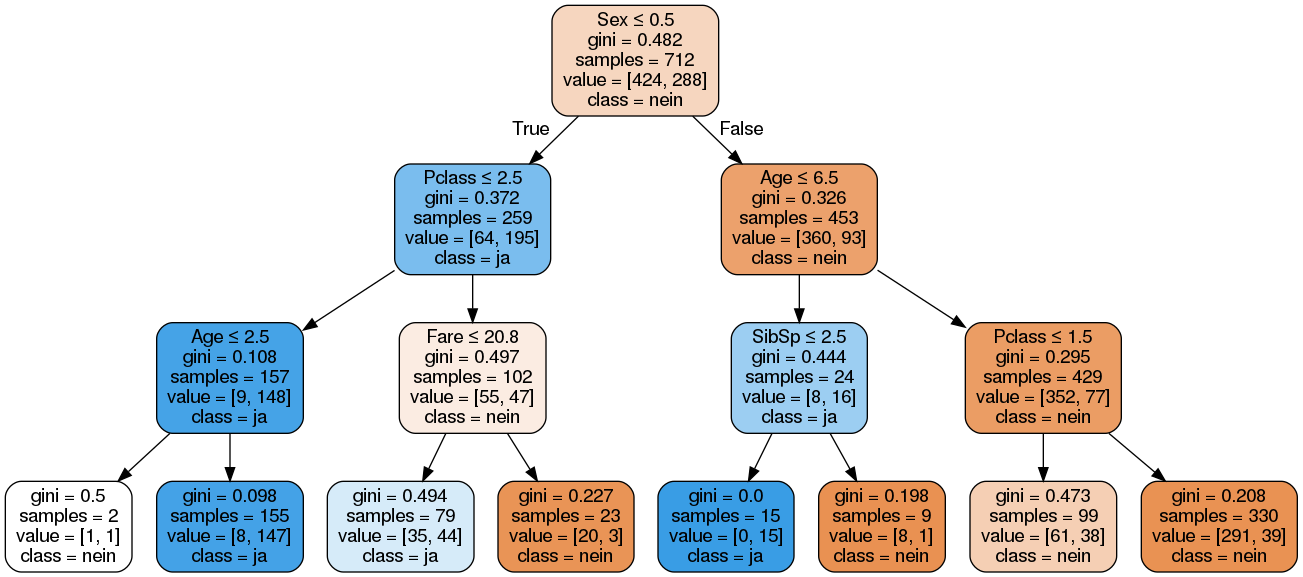

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                feature_names = X.columns,
                class_names = ['nein','ja'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 5. Interpretieren Sie das Ergebnis (zumindest teilweise). Welche Personen hatten die besten Überlebenschancen?